# London Bike Sharing -- Detailed EDA-- 

## **About Data**

https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset


In order to reduce traffic congestion and air pollution in London, the government encourages people to use shared bicycles. This demand for shared bicycles is influenced by several factors. Factors such as air temperature, humidity, wind, whether it is a holiday or weekend and the season are all important. In this study, the determinants of cycling demand in London are analyzed in order to shed some light on the determinants of cycling demand for company officials and policy makers. 

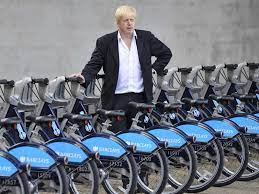

**Details of Data Set:** 
The dataset comprises several columns that provide valuable information for analyzing the demand for shared bicycles in London. These columns include:

**Timestamp:** This column contains a timestamp indicating the date and time of each observation. It enables grouping the data based on specific time intervals.

**cnt (count):** The "Cnt" column represents the count of new bike shares recorded for each timestamp, serving as the primary target variable for analyzing bicycle demand.

**t1:** This column represents the real temperature in Celsius recorded at the time of observation.

**t2:** The "t2" column represents the perceived temperature in Celsius, taking into account factors like wind chill or heat index, which may influence how the temperature is perceived by individuals.

**Hum (humudity):** The "Hum" column indicates the humidity level expressed as a percentage during each observation.

**windspeed:** This column provides information about the wind speed in kilometers per hour recorded at the time of observation.

**weather_code:** The "Weather_code" column categorizes the observed weather conditions into different categories. The weather codes and their corresponding categories are as follows:

* **1 -** Clear or mostly clear with possible haze, fog, or patches of fog
* **2 -** Scattered clouds or few clouds
* **3 -** Broken clouds
* **4 -** Cloudy
* **7 -** Rain, light rain shower, or light rain
* **10 -** Rain with thunderstorm 
* **26 -** Snowfall.

**is _holiday:** This boolean column indicates whether the day of the observation is a holiday (1) or a non-holiday (0).

**is_weekend:** This boolean column indicates whether the day of the observation falls on a weekend (1) or a non-weekend day (0).

**season:** The "Season" column categorizes the time of the observation into four seasons: 
    **0 -** Spring, 
    **1 -** Summer, 
    **2 -** Fall, 
    **3 -** Winter.

This dataset encompasses various essential factors related to weather, time, and environmental conditions that influence the demand for shared bicycles in London. Analyzing these variables can provide valuable insights into the significant factors affecting the utilization of bike-sharing services in the city.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [2]:
df = pd.read_csv("/kaggle/input/london-bike-sharing-dataset/london_merged.csv")
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [ ]:
df.shape

# Null values check

In [ ]:
df.isnull().sum()

**Insıght 1:**  There is not any null value in data set.

# Duplicated rows check 

In [ ]:
df.duplicated().value_counts()

# Duplicated rows check

In [ ]:
df.duplicated().sum()

**Insight 2:** There is not any duplicate row in data set.

 # Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode) 

In [ ]:
# In order to analyse the distribution of the data, "displot", "hisplot" or "kdeplot" are generally used. 
# Count and bar plot for categorical plots.

In [ ]:
df.info()

# Chancing datatypes 
* Categorical variables such as "season", "haliday", "weekend" and "weathercode" have float64 data type. 
* Before starting the analyses, we want to transform them into categorical (object) variables.

In [3]:
# Season
df['season'].replace(0, 'Spring', inplace=True)
df['season'].replace(1, 'Summer', inplace=True)
df['season'].replace(2, 'Fall', inplace=True)
df['season'].replace(3, 'Winter', inplace=True)

#--------------------------------------------------

#Is Holiday
df['is_holiday'].replace(1, 'Holiday', inplace=True)
df['is_holiday'].replace(0, 'Non-holiday', inplace=True)

#--------------------------------------------------------

# Is weekend
df['is_weekend'].replace(1, 'Weekend', inplace=True)
df['is_weekend'].replace(0, 'Non-weekend', inplace=True)

#------------------------------------------------------------

#Weather Codes
df['weather_code'].replace(1, 'Clear', inplace=True)
df['weather_code'].replace(2, 'scattered clouds', inplace=True)
df['weather_code'].replace(3, 'Broken clouds', inplace=True)
df['weather_code'].replace(4, 'Cloudy', inplace=True)
df['weather_code'].replace(7, 'Rain', inplace=True)
df['weather_code'].replace(10, 'rain with thunderstorm', inplace=True)
df['weather_code'].replace(26, 'snowfall', inplace=True)
df['weather_code'].replace(94, 'Freezing Fog', inplace=True)
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter


In [ ]:
df.info()

* Categorical variables such as "season", "holiday", "weekend" and "weathercode" turned to object data type, now.

# Feature Engineering - segregate day and month from timestamp

"timestamp" is in object form. We should change it to "datetime" for excracting day and month infos. 

# timestampt to datetime

In [ ]:
df['date'] = pd.to_datetime(df['timestamp']) # Alternative way; df.timestamp = pd.to_datetime(df.timestamp). We assigned it to itself to make the change permanent. 

In [ ]:
df.info()

* The "date" data in "timestamp" format was converted to "datetime" format.  

In [ ]:
# Let`s exctarct the day and month names from `date` column.

df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df.head(2)

In [ ]:
#Check sum of bike-sharing/renting records per day:

monthly_bike_share  = (df.groupby('day')['cnt'].sum()/1000000).round(1)
monthly_bike_share

# Bike sharing by days

In [ ]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Daily Bike Sharing (Million)")
ax.set_xlabel('') # To cancel writing "day" on the x-axis 

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing is higher on Tuesday, Wednesday and Thursdays.

# Bike sharing by months

In [ ]:
# Month

monthly_bike_share  = (df.groupby('month')['cnt'].sum()/1000000).round(1)
monthly_bike_share

In [ ]:
# Month

plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Daily Bike Sharing (Million)")
ax.set_xlabel('')  # To cancel writing "month" on the x-axis

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing is less in January, February and December. But it is high in summer time.

# Bike usage by season, wheather, holiday and weekend

In [ ]:
#Season 

seasonally_bike_share  = (df.groupby('season')['cnt'].sum()/1000000).round(1)
seasonally_bike_share

In [ ]:
#Season 

plt.figure(figsize=(12,5))

ax=sns.barplot(x=seasonally_bike_share.index, y=seasonally_bike_share.values, errorbar=None)
ax.set_title("Seasonally Bike Sharing (Million)")
ax.set_xlabel('') # To cancel writing "season" on the x-axis 

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing is low i the winter season adn high in the summer time.

# Bike usage by weather condition

In [ ]:
# Weather 

weather_bike_share  = (df.groupby('weather_code')['cnt'].sum()/1000000).round(1)
weather_bike_share

In [ ]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=weather_bike_share.index, y=weather_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Different Weather Conditions (Million)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('') # To cancel writing "weather" on the x-axis 

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing high at clear, broke cloudly and scattered cloudly days.

# Bikse usage by holidays/non-holidays

In [ ]:
# Holiday 

weather_bike_share  = (df.groupby("is_holiday")['cnt'].sum()/1000000).round(1)
weather_bike_share

In [ ]:
# Holiday 

plt.figure(figsize=(12,5))

ax=sns.barplot(x=weather_bike_share.index, y=weather_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Holidays (Million)")
ax.set_xlabel('') # To cancel writing "cnt" on the x-axis 

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing high at non-holidays.

# Bike usage by weekends/weekdays

In [ ]:
# Weekend 

weekend_bike_share  = (df.groupby('is_weekend')['cnt'].sum()/1000000).round(1)
weekend_bike_share

In [ ]:
# Weekend

plt.figure(figsize=(12,5))

ax=sns.barplot(x=weekend_bike_share.index, y=weekend_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Weekends (Million)")
ax.set_xlabel('') # To cancel writing "is_weekend" on the x-axis 

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing high on week days.

# 2. WAY for drawing figures

In [ ]:
# 2. Way:

fig, ax = plt.subplots(2,2, figsize=(12, 12))


#ax=sns.barplot(data=df, x="season", y="cnt", errorbar=None)

# first plot by season
sns.barplot(data=df, x="season", y="cnt", ax = ax[0][0], errorbar=None)
ax[0][0].set_xlabel("Season")
ax[0][0].set_ylabel('Count')
ax[0][0].set_title('Distribution of Season')
ax[0][0].set_xlabel('')

# second plot by holiday
sns.countplot(data=df, x="is_holiday", ax=ax[0][1])
ax[0][1].set_xlabel("is_holiday")
ax[0][1].set_ylabel('Count')
ax[0][1].set_title('Distribution of is_holiday')
ax[0][1].set_xlabel('')

# third plot by weekend
sns.countplot(data=df, x="is_weekend", ax=ax[1][0])
ax[1][0].set_xlabel("is_weekend")
ax[1][0].set_ylabel('Count')
ax[1][0].set_title('Distribution of is_weekend')
ax[1][0].set_xlabel('')

# fourth plot by weather code
sns.countplot(data=df, x="weather_code", ax=ax[1][1])
ax[1][1].set_xlabel("weather_code")
ax[1][1].set_ylabel('Count')
ax[1][1].set_title('Distribution of weather_code')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=45, ha='right')
ax[1][1].set_xlabel('')

fig.tight_layout()
plt.show()

**Insight:** People rent bicycles most often on days when the weather is "clear". In second place are the days with "scatter clouds" and in third place are the days with "broken clouds". Interestingly, more bicycles are rented on "rainy" days than on "cloudy" days. On snowy and stormy days, bicycle hire is around zero.
* Demand for bicycle hire is higher on working days and on days with clear weather.

# Distribution Analyses with Object Oriented Method (OOM)

In [ ]:
# For distribution analyses by OOM;

df_discrete = ["season", "is_holiday", "is_weekend", "weather_code"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    feature = df_discrete[i]
    
    # Create a histogram for each feature
    sns.histplot(data=df, x=feature, kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of ' + feature)
    
    # If it is necessary; Rotate x-axis 
    ax.tick_params(axis='x', rotation=45)
    
fig.tight_layout()
plt.show()

In [ ]:
df_discrete = ["season", "is_holiday", "is_weekend", "weather_code"]
for i in df_discrete:
    sns.kdeplot(data = df, x = i, fill = True, linewidth = 2, color = "#9B1B30")
    # if there was hue parameter we would have used palette instead of color.
    plt.title(i)
    plt.show()

* Demand for bicycle hire is higher on working days and on days with clear weather.

# boxenplots for outlier analyses

In [ ]:
plt.figure(figsize=(20,3))
plt.title('Bike Number')
sns.boxenplot(x=df["cnt"], color='g');

* There are 5 outlier in shared bike umber (cnt) on the higher side.

In [ ]:
plt.figure(figsize=(20,3))
plt.title('Hummudity')
sns.boxenplot(x=df["hum"], color='g');

* There are 4 outlier in hummudity on the low side.

In [ ]:
plt.figure(figsize=(20,3))
plt.title('Wind Speed')
sns.boxenplot(x=df["wind_speed"], color='g');

* There are 4 outlier in wind speed on the higher side.

# Look at the data type of each variable, transform timestamp in type, and set it as index.

In [2]:
# Read again data set;

df=pd.read_csv("/kaggle/input/london-bike-sharing-dataset/london_merged.csv")
df.sample(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
15797,2016-10-28 13:00:00,1783,16.0,16.0,68.0,13.0,3.0,0.0,0.0,2.0
3562,2015-06-01 18:00:00,3273,14.0,14.0,53.0,27.0,2.0,0.0,0.0,1.0


In [ ]:
df.info()

In [3]:
# Let's convert the variable "timestamp" from object format to "datetime" format;

df['date'] = pd.to_datetime(df['timestamp'])

In [4]:
df['date'].dtypes 

dtype('<M8[ns]')

In [5]:
#I want to use timestamp as index.
# If we don`t use timespamp as index, we couldn`t use next method for extracting date infos from timestamp;

df = df.set_index(df['date']) 
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
date,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04 00:00:00
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04 01:00:00


# Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.


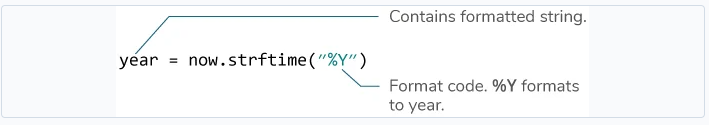

https://www.programiz.com/python-programming/datetime/strftime

**Directive Meaning Example**

* **%a** Abbreviated weekday name. Sun, Mon, ...
* **%A** Full weekday name. Sunday, Monday, ...
* **%w** Weekday as a decimal number. 0, 1, ..., 6
* **%d** Day of the month as a zero-padded decimal. 01, 02, ..., 31
* **%-d** Day of the month as a decimal number. 1, 2, ..., 30
* **%b** Abbreviated month name. Jan, Feb, ..., Dec
* **%B** Full month name. January, February, ...
* **%m** Month as a zero-padded decimal number. 01, 02, ..., 12
* **%-m** Month as a decimal number. 1, 2, ..., 12
* **%y** Year without century as a zero-padded decimal number. 00, 01, ..., 99
* **%-y** Year without century as a decimal number. 0, 1, ..., 99
* **%Y** Year with century as a decimal number. 2013, 2019 etc.
* **%H** Hour (24-hour clock) as a zero-padded decimal number. 00, 01, ..., 23
* **%-H** Hour (24-hour clock) as a decimal number. 0, 1, ..., 23
* **%I** Hour (12-hour clock) as a zero-padded decimal number. 01, 02, ..., 12
* **%-I** Hour (12-hour clock) as a decimal number. 1, 2, ... 12
* **%p** Locale’s AM or PM. AM, PM
* **%M** Minute as a zero-padded decimal number. 00, 01, ..., 59
* **%-M** Minute as a decimal number. 0, 1, ..., 59
* **%S** Second as a zero-padded decimal number. 00, 01, ..., 59
* **%-S** Second as a decimal number. 0, 1, ..., 59
* **%f** Microsecond as a decimal number, zero-padded on the left. 000000 - 999999
* **%z** UTC offset in the form +HHMM or -HHMM.
* **%Z** Time zone name.
* **%j** Day of the year as a zero-padded decimal number. 001, 002, ..., 366
* **%-j** Day of the year as a decimal number. 1, 2, ..., 366
* **%U** Week number of the year (Sunday as the first day of the week). All days in a new year preceding the first Sunday are considered to be in week 0. 00, 01, ..., 53
* **%W** Week number of the year (Monday as the first day of the week). All days in a new year preceding the first Monday are considered to be in week 0. 00, 01, ..., 53
* **%c** Locale’s appropriate date and time representation. Mon Sep 30 07:06:05 2013
* **%x** Locale’s appropriate date representation. 09/30/13
* **%X** Locale’s appropriate time representation. 07:06:05
* **%% A** literal '%' character. %


In [6]:
# Let's take years of "datetime" data.

df["year"] = df.index.strftime("%Y")
df["year"]

date
2015-01-04 00:00:00    2015
2015-01-04 01:00:00    2015
2015-01-04 02:00:00    2015
2015-01-04 03:00:00    2015
2015-01-04 04:00:00    2015
                       ... 
2017-01-03 19:00:00    2017
2017-01-03 20:00:00    2017
2017-01-03 21:00:00    2017
2017-01-03 22:00:00    2017
2017-01-03 23:00:00    2017
Name: year, Length: 17414, dtype: object

In [7]:
# 2.WAY: 
df['year'] = df.index.year # timestamp must be set as index for this to work.  
df["year"] 

date
2015-01-04 00:00:00    2015
2015-01-04 01:00:00    2015
2015-01-04 02:00:00    2015
2015-01-04 03:00:00    2015
2015-01-04 04:00:00    2015
                       ... 
2017-01-03 19:00:00    2017
2017-01-03 20:00:00    2017
2017-01-03 21:00:00    2017
2017-01-03 22:00:00    2017
2017-01-03 23:00:00    2017
Name: year, Length: 17414, dtype: int64

In [8]:
# What is the day number?

df["day"] = df.index.strftime("%w") # df['day_of_week'] = df.index.day_name() bu da var ama gün isimlerini getiriyor. O günün, haftanın kacıncı gunu olduğunu getirmiyor. 
df["day"]

date
2015-01-04 00:00:00    0
2015-01-04 01:00:00    0
2015-01-04 02:00:00    0
2015-01-04 03:00:00    0
2015-01-04 04:00:00    0
                      ..
2017-01-03 19:00:00    2
2017-01-03 20:00:00    2
2017-01-03 21:00:00    2
2017-01-03 22:00:00    2
2017-01-03 23:00:00    2
Name: day, Length: 17414, dtype: object

In [9]:
# Day names;

df['day_name'] = df.index.day_name()
df['day_name'] 

date
2015-01-04 00:00:00     Sunday
2015-01-04 01:00:00     Sunday
2015-01-04 02:00:00     Sunday
2015-01-04 03:00:00     Sunday
2015-01-04 04:00:00     Sunday
                        ...   
2017-01-03 19:00:00    Tuesday
2017-01-03 20:00:00    Tuesday
2017-01-03 21:00:00    Tuesday
2017-01-03 22:00:00    Tuesday
2017-01-03 23:00:00    Tuesday
Name: day_name, Length: 17414, dtype: object

In [10]:
# Which day of month;

df["month"] = df.index.strftime("%d") # 2.YOL: df['day_of_month'] = df.index.day
df["month"]

date
2015-01-04 00:00:00    04
2015-01-04 01:00:00    04
2015-01-04 02:00:00    04
2015-01-04 03:00:00    04
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    03
2017-01-03 20:00:00    03
2017-01-03 21:00:00    03
2017-01-03 22:00:00    03
2017-01-03 23:00:00    03
Name: month, Length: 17414, dtype: object

In [11]:
# hour 1. WAY;  

df["hour"] = df.index.strftime("%H")
df["hour"]

date
2015-01-04 00:00:00    00
2015-01-04 01:00:00    01
2015-01-04 02:00:00    02
2015-01-04 03:00:00    03
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    19
2017-01-03 20:00:00    20
2017-01-03 21:00:00    21
2017-01-03 22:00:00    22
2017-01-03 23:00:00    23
Name: hour, Length: 17414, dtype: object

In [12]:
# 2. WAY; Hour; 

df['hour2'] = df.index.hour
df['hour2'] 

date
2015-01-04 00:00:00     0
2015-01-04 01:00:00     1
2015-01-04 02:00:00     2
2015-01-04 03:00:00     3
2015-01-04 04:00:00     4
                       ..
2017-01-03 19:00:00    19
2017-01-03 20:00:00    20
2017-01-03 21:00:00    21
2017-01-03 22:00:00    22
2017-01-03 23:00:00    23
Name: hour2, Length: 17414, dtype: int64

# Visualize the correlation with a heatmap

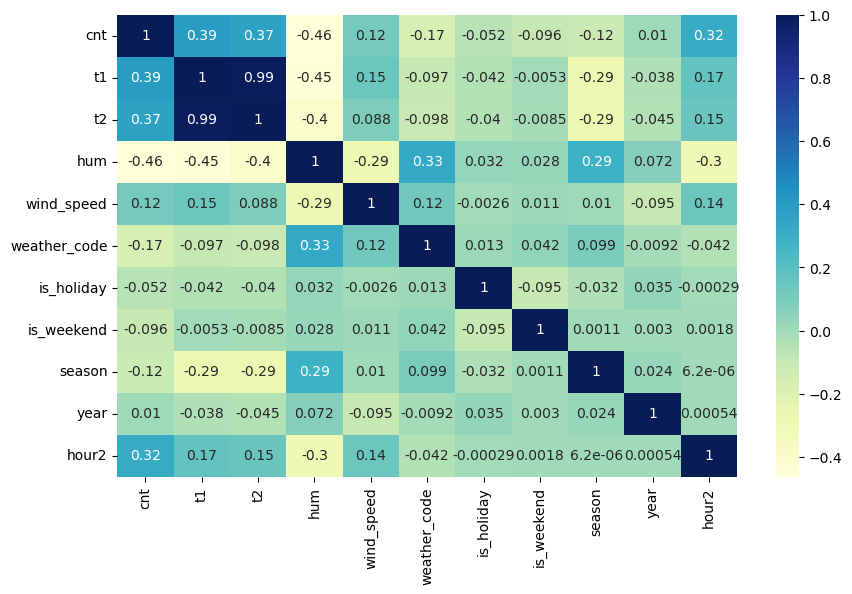

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes("number").corr(), cmap="YlGnBu", annot=True);

* There is a very high (0.99) correlation between the announced air temperature (t1) and the sensed air temperature (t2) and it would be appropriate to include only one of them in the ML analyses. 
* There is a positive and relatively strong (0.39) relationship between air temperature and the number of bicycles rented. 
* There is a negative and relatively strong (0.45) relationship between air temperature (t1) and humidity. 
* There is a negative and relatively strong (0.29) relationship between wind speed and humidity. 

# Visualize the correlation of the target variable and the other features with barplot

In [14]:
# Corr():

df_corr_cnt = df.select_dtypes("number").corr()[["cnt"]].sort_values(by="cnt", ascending=False) # 2. way; df.corr().cnt
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour2,0.324423
wind_speed,0.116295
year,0.010046
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
weather_code,-0.166633


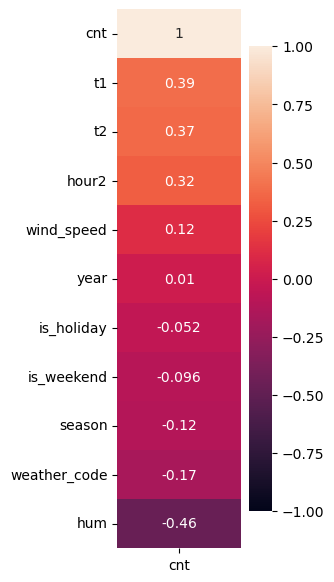

In [15]:
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt, annot=True, vmin=-1, vmax=1);

* There is a positive correlation between bike sharing and temperature and a negative correlation between bike sharing and humidity.

In [16]:
# Relation with the target variable (cnt) and other variables by barplot

target_corr = df.select_dtypes("number").corr().drop(["cnt"])
target_corr

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour2
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.000006
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,0.000542
hour2,0.324423,0.168708,0.153956,-0.295653,0.141792,-0.041786,-0.000288,0.001803,0.000006,0.000542,1.000000


In [17]:
target = target_corr["cnt"].sort_values(ascending=False)
target

t1              0.388798
t2              0.369035
hour2           0.324423
wind_speed      0.116295
year            0.010046
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
weather_code   -0.166633
hum            -0.462901
Name: cnt, dtype: float64

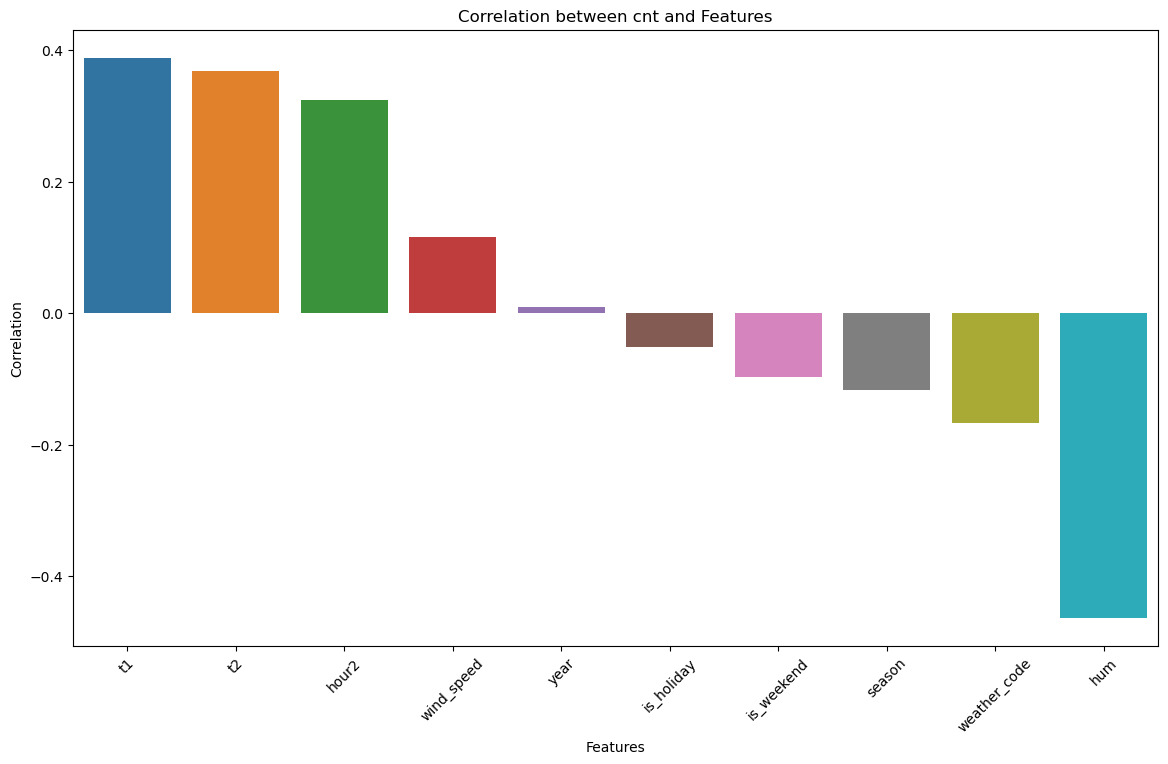

In [18]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target.index, y=target.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45) # in OOM we use ax.tick_params(axis = "x", rotation = 45) instead
plt.show()

* There are positive correlation between number of bike sharing and  temperature, hour, wind speed and season.On the other hand there are negative correlation between bike sharing and holidays, weekends, cold weather and hummudity.  

# Plot bike shares over time use lineplot.

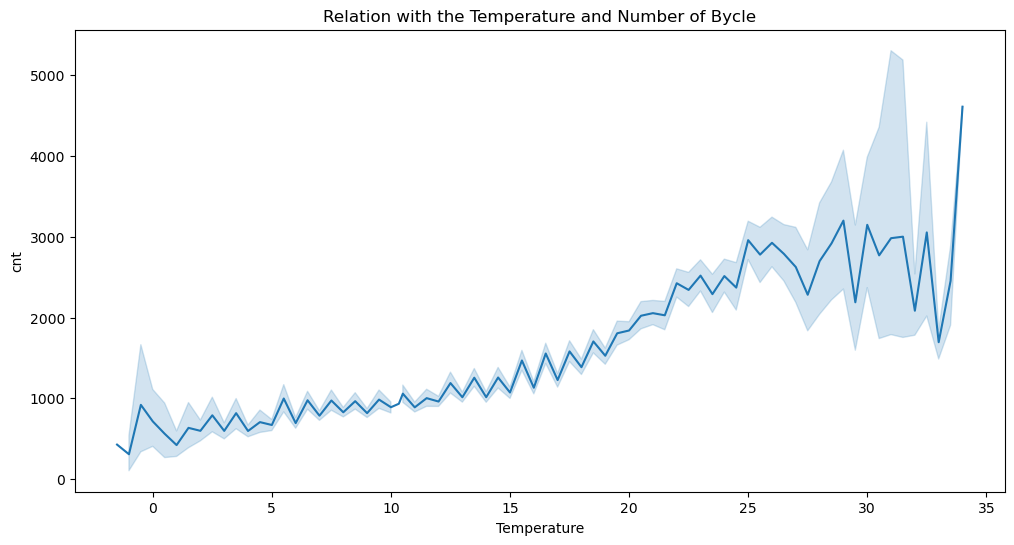

In [19]:
# Relation with the target variable (cnt) and temperature (t1) with lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="t1", y="cnt")
plt.title("Relation with the Temperature and Number of Bycle")
plt.xlabel("Temperature")

plt.show()

* As the air temperature increases, the number of bicycle rentals also increases, and when the air temperature exceeds 33 degrees Celsius, the number of bicycle rentals increases very quickly. Then when temperature exceeds 33 the number of bicycle rentals increases sharply.

# Relation with the target variable (cnt) and hummudity (hum)  with lineplot

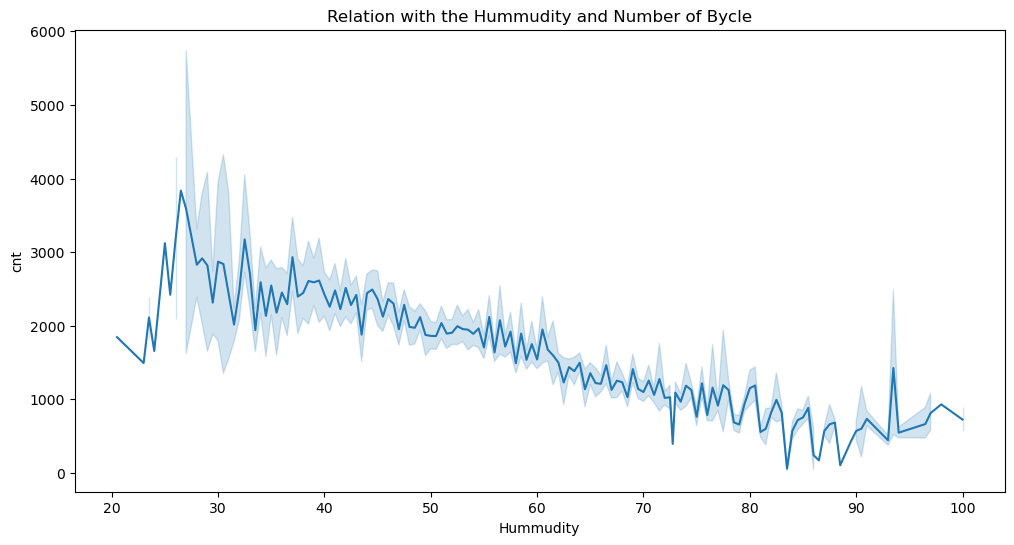

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="hum", y="cnt")
plt.title("Relation with the Hummudity and Number of Bycle")
plt.xlabel("Hummudity")

plt.show()

* There is anegative relatrionship between hummidity and number of bike sharing.
# Relation with the target variable (cnt) and wind speed (wind_speed)  with lineplot

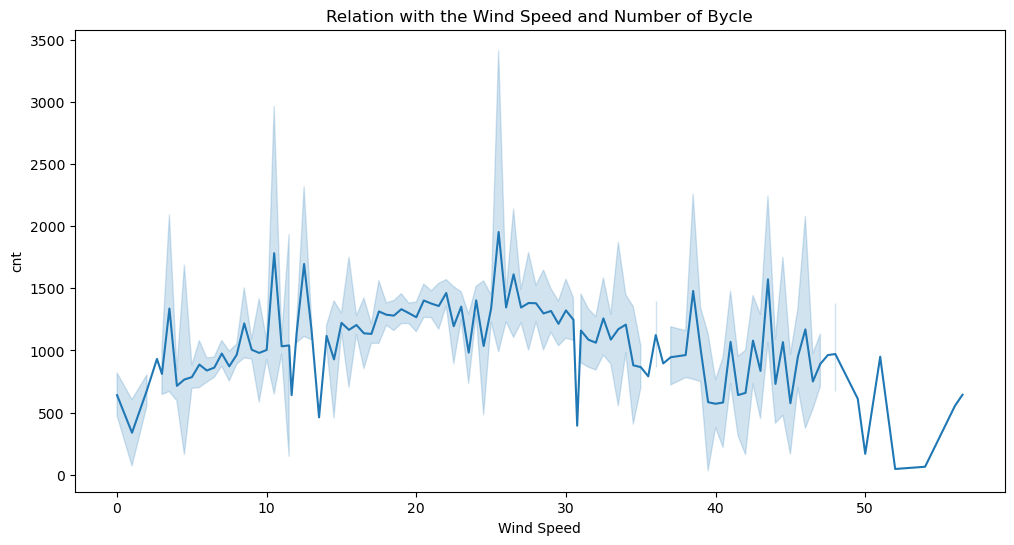

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="wind_speed", y="cnt")
plt.title("Relation with the Wind Speed and Number of Bycle")
plt.xlabel("Wind Speed")

plt.show()

* There is a concave parabolic relationship between wind speed and bicycle hire.
* While people prefer to rent bicycles in light windy weather, they give up renting bicycles when the wind speed exceeds 26 km/h.

# Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).

In [16]:
df=pd.read_csv("/kaggle/input/london-bike-sharing-dataset/london_merged.csv")

In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [18]:
df = df.set_index('timestamp') 

In [19]:
df["year_month"] = df.index.strftime('%Y-%m') # we are obtaining year and moth together here.
df["year_month"]

timestamp
2015-01-04 00:00:00    2015-01
2015-01-04 01:00:00    2015-01
2015-01-04 02:00:00    2015-01
2015-01-04 03:00:00    2015-01
2015-01-04 04:00:00    2015-01
                        ...   
2017-01-03 19:00:00    2017-01
2017-01-03 20:00:00    2017-01
2017-01-03 21:00:00    2017-01
2017-01-03 22:00:00    2017-01
2017-01-03 23:00:00    2017-01
Name: year_month, Length: 17414, dtype: object

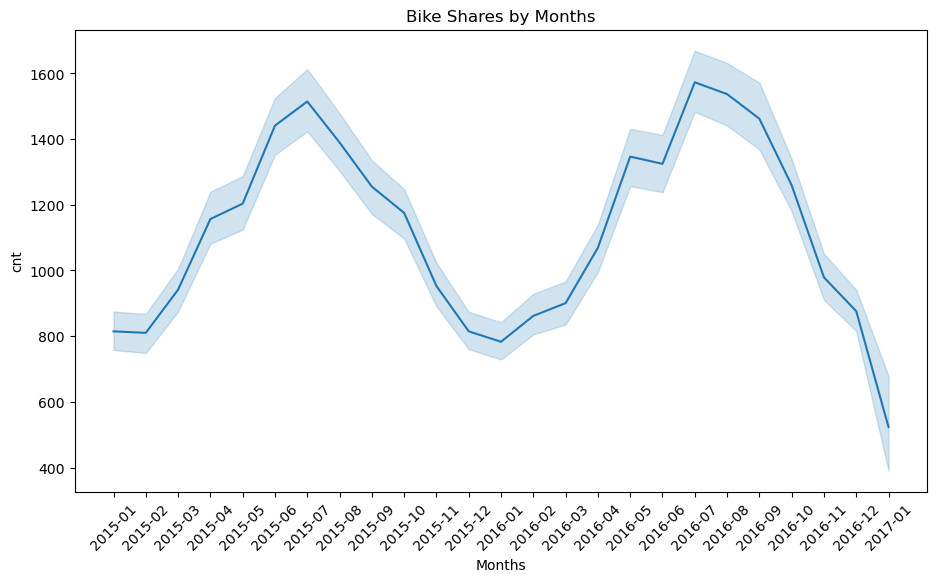

In [8]:
#  Bike shares by months with lineplot 

plt.figure(figsize=(11,6))

sns.lineplot(data=df, x="year_month", y="cnt")
plt.title("Bike Shares by Months")
plt.xlabel("Months")
#plt.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xticks(rotation=45)

plt.show()

* Demand for bicycle hire increases rapidly from March onwards, peaks in July and then starts to decline. The decline in demand accelerates after October, reaching its lowest levels between December and March.

In [20]:
df["month"] = df.index.strftime('%m') # we are obtaining moth here.
df["month"]

timestamp
2015-01-04 00:00:00    01
2015-01-04 01:00:00    01
2015-01-04 02:00:00    01
2015-01-04 03:00:00    01
2015-01-04 04:00:00    01
                       ..
2017-01-03 19:00:00    01
2017-01-03 20:00:00    01
2017-01-03 21:00:00    01
2017-01-03 22:00:00    01
2017-01-03 23:00:00    01
Name: month, Length: 17414, dtype: object

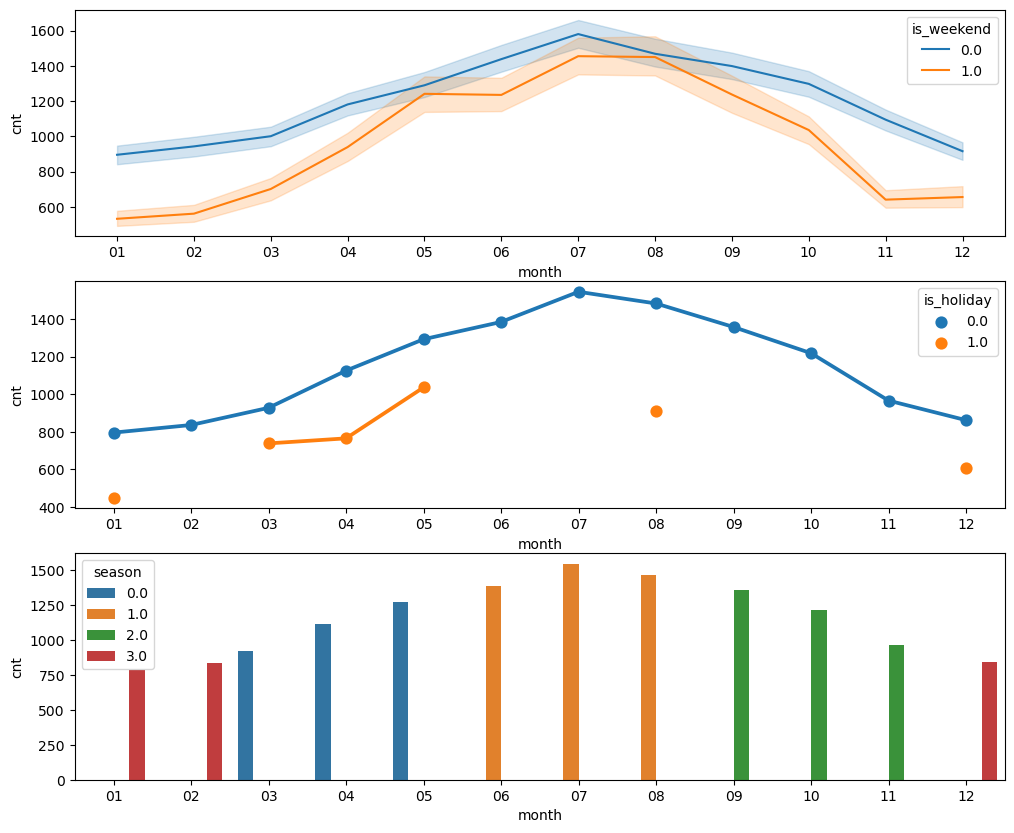

In [10]:
# In order to be able to make this analysis by taking into account the changes over the years;

fig, ax = plt.subplots(3,1, figsize=(12,10))

sns.lineplot(data=df,  x = "month", y="cnt", ax =ax[0], hue = "is_weekend")
sns.pointplot(data=df, x = "month", y="cnt", ax =ax[1], hue = "is_holiday", errorbar=None)
sns.barplot(data=df,   x = "month", y="cnt", ax =ax[2], hue = "season", errorbar=None)

plt.show()

* The number / demand for bicycle hire decreases towards the end of the year.

In [21]:
df["hour"] = df.index.strftime('%H') # we are obtaining hour here.
df["hour"]

timestamp
2015-01-04 00:00:00    00
2015-01-04 01:00:00    01
2015-01-04 02:00:00    02
2015-01-04 03:00:00    03
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    19
2017-01-03 20:00:00    20
2017-01-03 21:00:00    21
2017-01-03 22:00:00    22
2017-01-03 23:00:00    23
Name: hour, Length: 17414, dtype: object

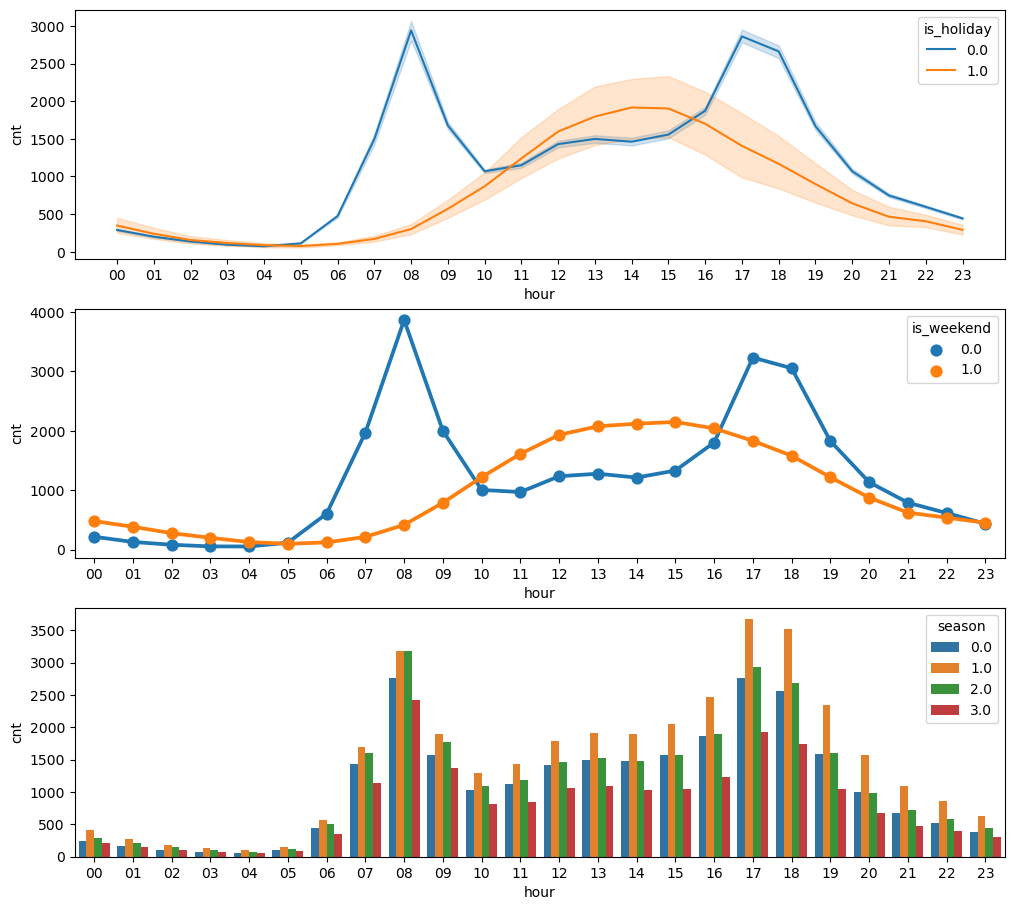

In [12]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df,  x="hour", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="hour", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df,   x="hour", y="cnt", hue="season",     ax=ax[2], errorbar=None)

plt.show()

 # Plot bike shares by day of week. You may want to see whether it is a holiday or not

In [22]:
df["day_of_week"] = df.index.strftime('%w') # we are obtaining day of week here.
df["day_of_week"]

timestamp
2015-01-04 00:00:00    0
2015-01-04 01:00:00    0
2015-01-04 02:00:00    0
2015-01-04 03:00:00    0
2015-01-04 04:00:00    0
                      ..
2017-01-03 19:00:00    2
2017-01-03 20:00:00    2
2017-01-03 21:00:00    2
2017-01-03 22:00:00    2
2017-01-03 23:00:00    2
Name: day_of_week, Length: 17414, dtype: object

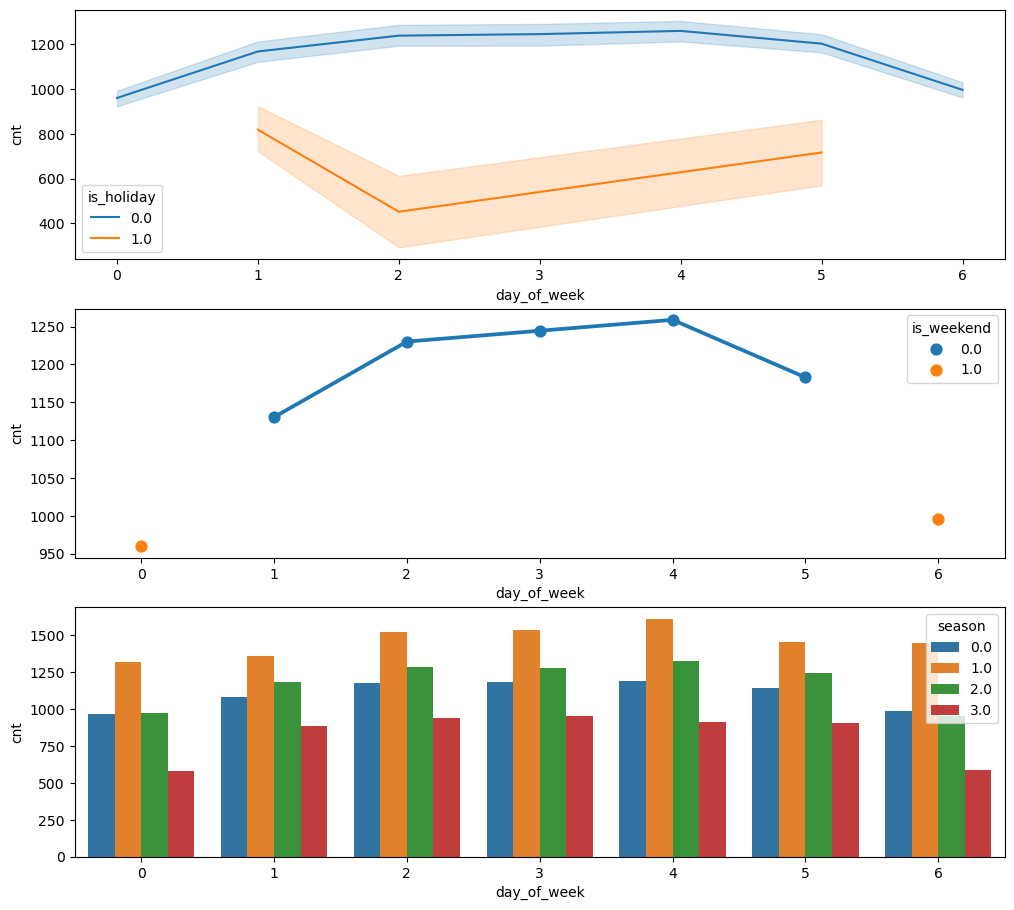

In [25]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df, x="day_of_week", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="day_of_week", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df, x="day_of_week", y="cnt", hue="season", ax=ax[2], errorbar=None)

plt.show()

* Bicycle rental is higher on weekdays during non-holiday periods. It is higher at summers.

# Plot bike shares by day of month

In [24]:
df["day"] = df.index.strftime('%-d') # we are obtaining day of the months here.
df["day"]

timestamp
2015-01-04 00:00:00    4
2015-01-04 01:00:00    4
2015-01-04 02:00:00    4
2015-01-04 03:00:00    4
2015-01-04 04:00:00    4
                      ..
2017-01-03 19:00:00    3
2017-01-03 20:00:00    3
2017-01-03 21:00:00    3
2017-01-03 22:00:00    3
2017-01-03 23:00:00    3
Name: day, Length: 17414, dtype: object

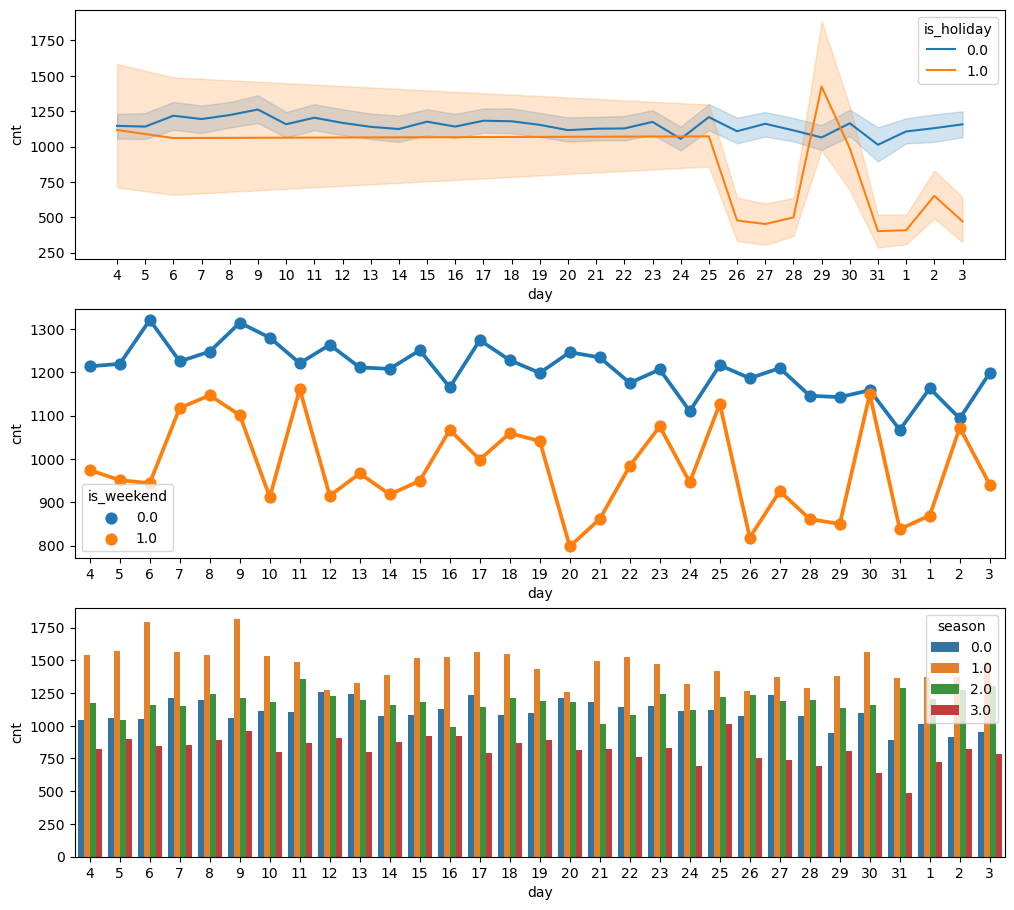

In [27]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df, x="day", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="day", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df, x="day", y="cnt", hue="season", ax=ax[2], errorbar=None)

plt.show()

* Bicycle hire demand generally fluctuates between 1000-1300 per day. It decreases end of the months and weekends.

# Plot bike shares by year (Plot bike shares on holidays by seasons)

In [29]:
df["year"] = df.index.strftime('%Y') # we are obtaining year here.
df["year"]

timestamp
2015-01-04 00:00:00    2015
2015-01-04 01:00:00    2015
2015-01-04 02:00:00    2015
2015-01-04 03:00:00    2015
2015-01-04 04:00:00    2015
                       ... 
2017-01-03 19:00:00    2017
2017-01-03 20:00:00    2017
2017-01-03 21:00:00    2017
2017-01-03 22:00:00    2017
2017-01-03 23:00:00    2017
Name: year, Length: 17414, dtype: object

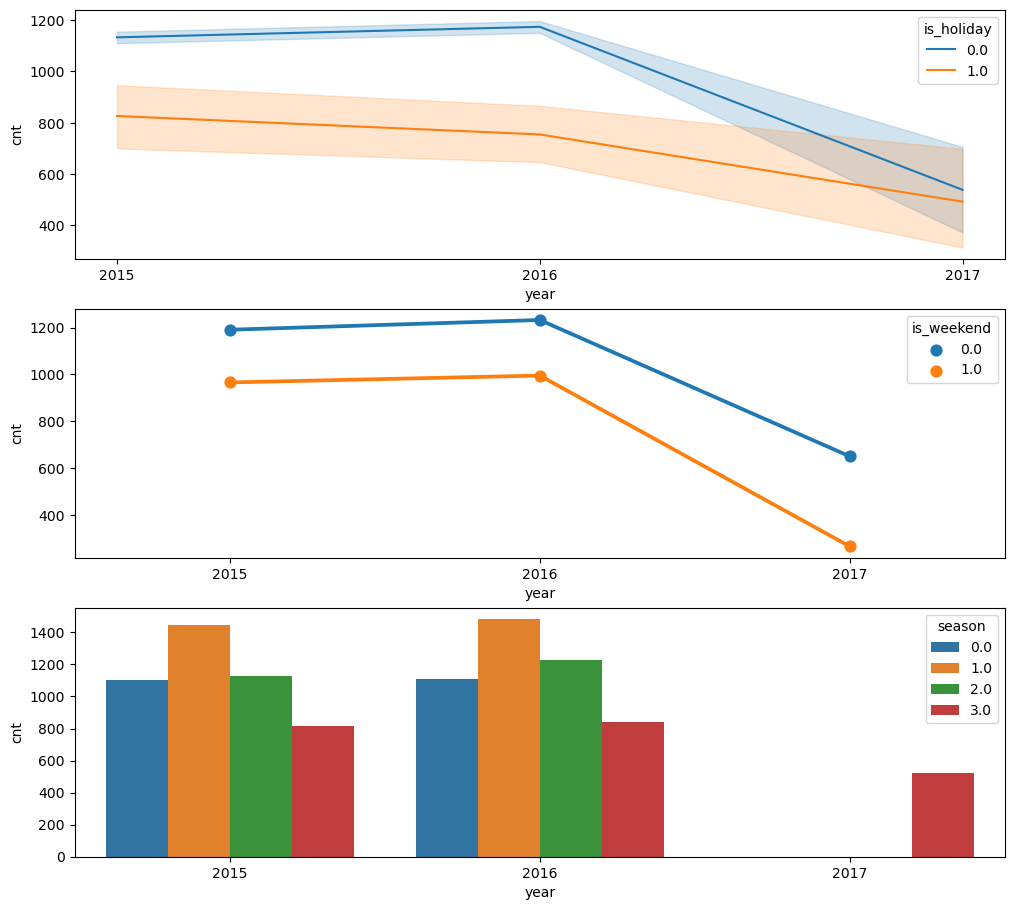

In [30]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df,  x="year", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="year", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df,   x="year", y="cnt", hue="season",     ax=ax[2], errorbar=None)

plt.show()

* According to these graphs, the demand for bicycle hire increased slightly from 2015 to 2016.
* The reason for the drop in 2017 is that the dataset contains only Jabuary data for this year.

# Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [32]:
df.groupby("is_weekend")["is_weekend"].value_counts()

is_weekend  is_weekend
0.0         0.0           12444
1.0         1.0            4970
Name: is_weekend, dtype: int64

In [33]:
df_isweekend = df.groupby("is_weekend")["cnt"].mean()
df_isweekend

is_weekend
0.0    1209.274831
1.0     977.415694
Name: cnt, dtype: float64

In [34]:
df_isweekend = round(df_isweekend,0)

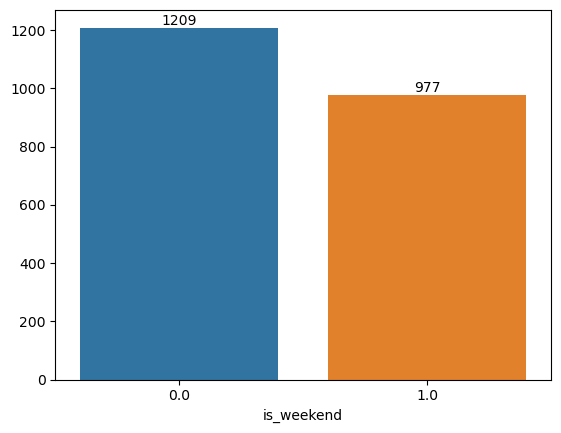

In [35]:
#  Bike shares by weekday/weekend with barchart

#plt.bar(df_isweekend.index, df_isweekend.values); # Matplotlib

# sns.barplot(data=df, x=df_isweekend.index, y=df_isweekend.values); # Saeborn

ax = sns.barplot(x=df_isweekend.index, y=df_isweekend.values, data=df, errwidth=0) # Seaborn axlarla (sutun ustlerine degerleri yazdirabilmek icin)
for i in ax.containers:
    ax.bar_label(i)

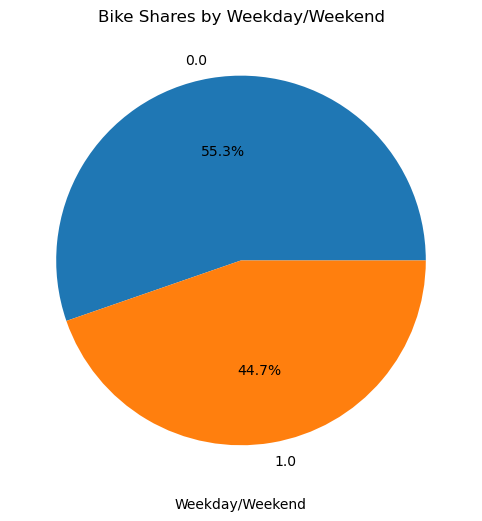

In [36]:
#  Bike shares by weekday/weekend with piechart by using Matplotlib

plt.figure(figsize=(8,6))

plt.pie( df_isweekend.values, labels= df_isweekend.index, autopct="%1.1f%%")
plt.title("Bike Shares by Weekday/Weekend")
plt.xlabel("Weekday/Weekend")

plt.show()

* Demand for bicycle hire is lower at weekends.

# Plot the distribution of weather code by seasons

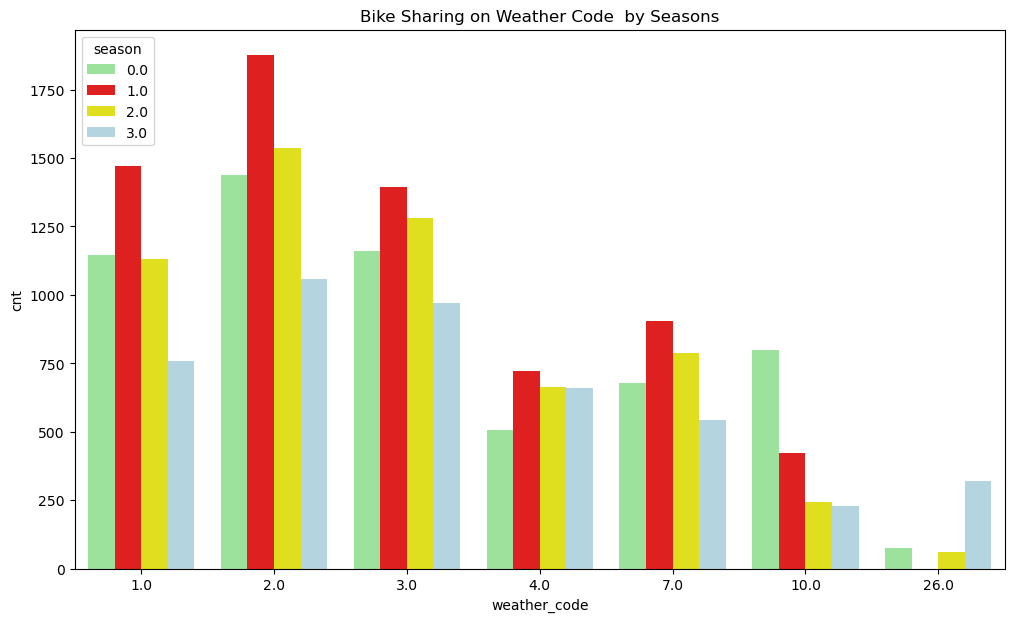

In [37]:
colors_of_seasons = ["lightgreen", "red", "yellow", "lightblue"]
plt.figure(figsize=(12,7))
sns.barplot(data=df, x="weather_code", y="cnt", hue="season", palette = colors_of_seasons, errorbar=None) # errorbar=None barların uzerinde ci cubuklarının cıkmasını onler.
plt.title("Bike Sharing on Weather Code  by Seasons")
plt.show()

* Demand for bicycle hire is higher in summer.

In [38]:
df_season = df.groupby("season")["cnt"].mean()
df_season

season
0.0    1103.831589
1.0    1464.465238
2.0    1178.954218
3.0     821.729099
Name: cnt, dtype: float64

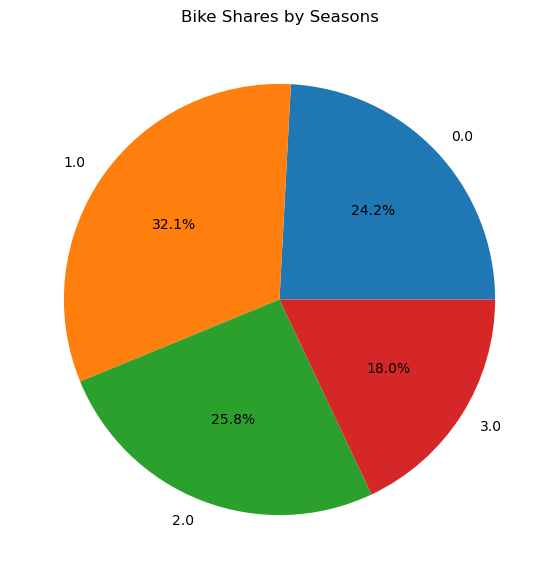

In [39]:
plt.figure(figsize=(10,7))

plt.pie( df_season.values, labels= df_season.index, autopct="%1.1f%%")
plt.title("Bike Shares by Seasons")
#plt.xlabel("Weekday/Weekend")

plt.show()

* 32% of the bicycle rental transactions took place in autumn, 25.8% in spring and 24.2% in winter.

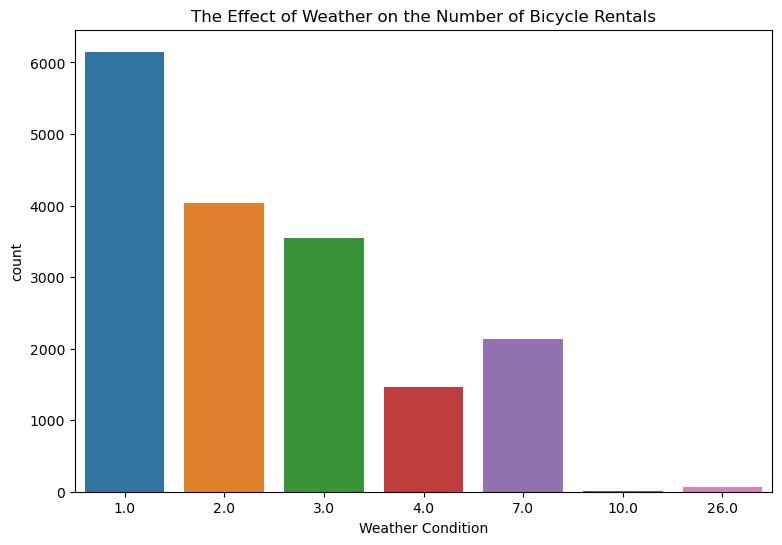

In [40]:
#For weather_condition;
plt.figure(figsize=(9,6))

sns.countplot(data=df, x=df["weather_code"])
plt.title("The Effect of Weather on the Number of Bicycle Rentals")
plt.xlabel("Weather Condition")

plt.show()

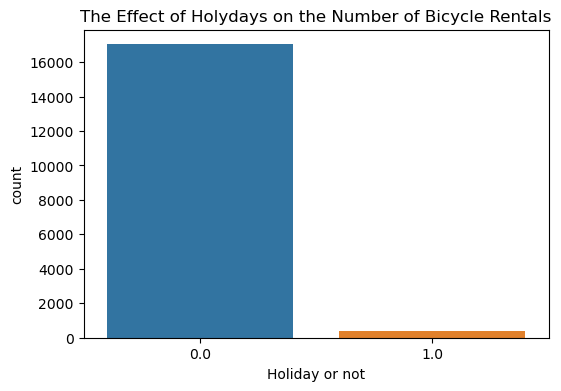

In [41]:
#For holydays

plt.figure(figsize=(6,4))

sns.countplot(data=df, x=df["is_holiday"]);
plt.title("The Effect of Holydays on the Number of Bicycle Rentals")
plt.xlabel("Holiday or not")

plt.show()

In [44]:
df["new_feature"] = df.groupby(["is_holiday"])["cnt"].value_counts().mean()
df["new_feature"] = df["new_feature"].round()
df["new_feature"]

timestamp
2015-01-04 00:00:00    4.0
2015-01-04 01:00:00    4.0
2015-01-04 02:00:00    4.0
2015-01-04 03:00:00    4.0
2015-01-04 04:00:00    4.0
                      ... 
2017-01-03 19:00:00    4.0
2017-01-03 20:00:00    4.0
2017-01-03 21:00:00    4.0
2017-01-03 22:00:00    4.0
2017-01-03 23:00:00    4.0
Name: new_feature, Length: 17414, dtype: float64

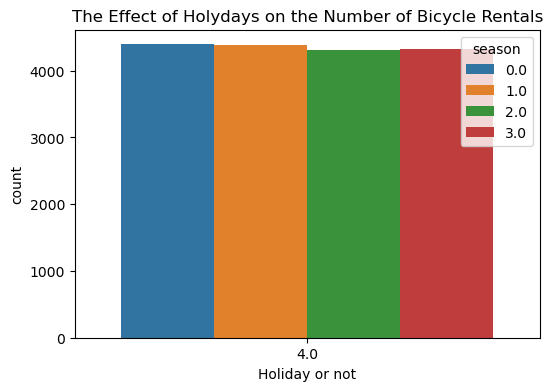

In [45]:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x=df["new_feature"], hue="season" );
plt.title("The Effect of Holydays on the Number of Bicycle Rentals")
plt.xlabel("Holiday or not")

plt.show()

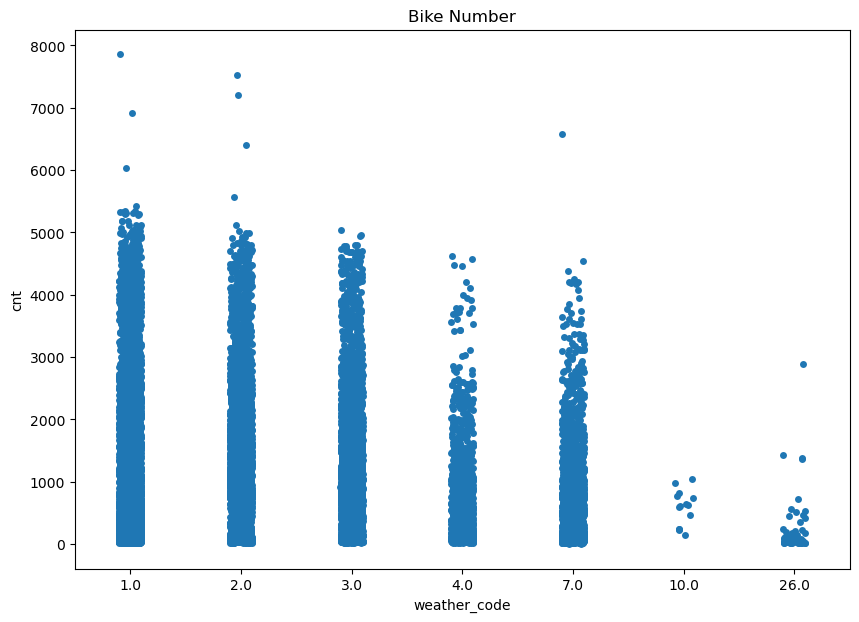

In [46]:
plt.figure(figsize=(10,7))
plt.title('Bike Number')
sns.stripplot(data=df, x="weather_code", y="cnt");

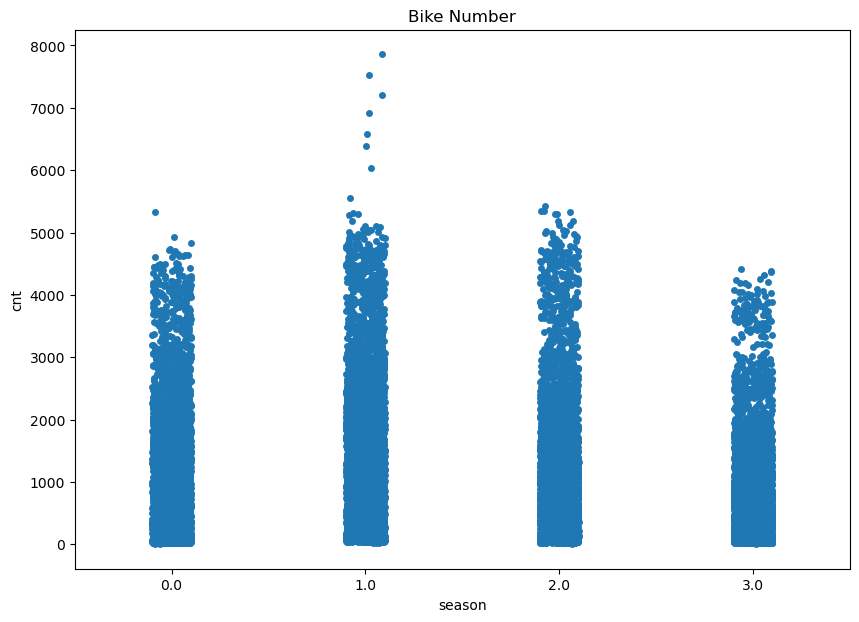

In [47]:
plt.figure(figsize=(10,7))
plt.title('Bike Number')
sns.stripplot(data=df, x="season", y="cnt");

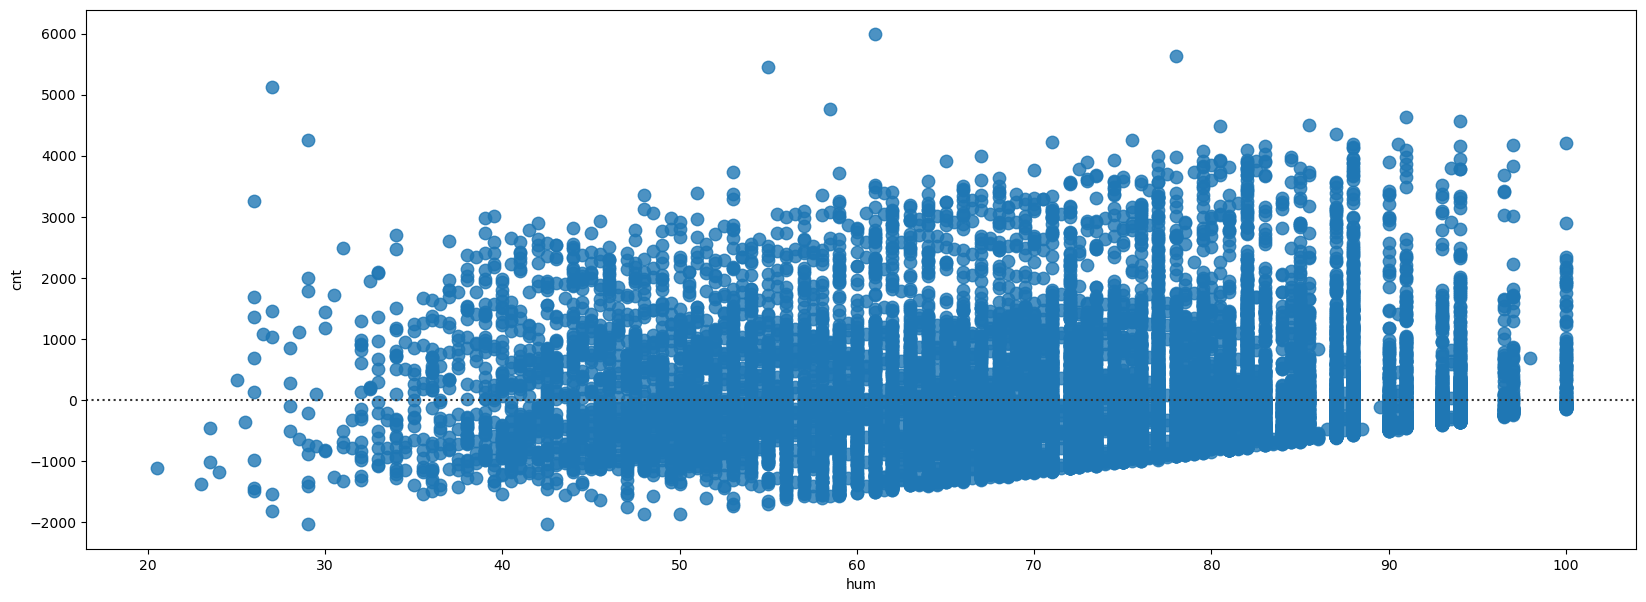

In [48]:
plt.figure(figsize=(20,7))
sns.residplot( data=df, x="hum", y="cnt", scatter_kws={"s": 80});

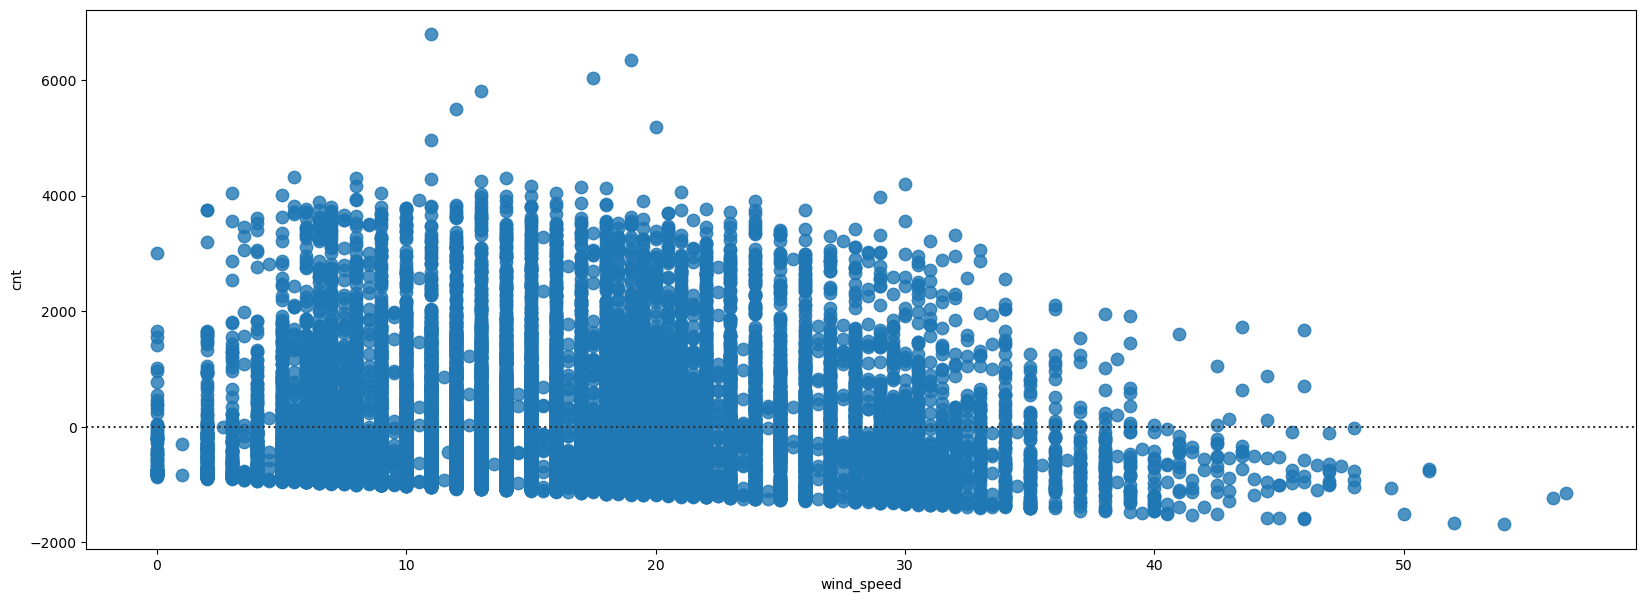

In [50]:
plt.figure(figsize=(20,7))
sns.residplot( data=df, x="wind_speed", y="cnt", scatter_kws={"s": 80});

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

This study analyses the demand for bicycle hire by people living in London, the capital city of England, in the period 2015-2017. For 2017, only January data is available. According to the results obtained from the analyses;

**1-** People rent bicycles most often on days when the weather is "clear". In second place are the days with "scatter clouds" and in third place are the days with "broken clouds". Interestingly, more bicycles are rented on "rainy" days than on "cloudy" days. On snowy and stormy days, bicycle hire is around zero.

**2-** People tend to hire bicycles less on weekends and holidays. 

**3-** Similarly bicycle rental is slightly lower in winter and autumn then spring and summer.

**4-** People's demand for bicycle hire is lower on Fridays.  

**5-** According to correlation analysis; there is a very high (0.99) correlation between the announced air temperature (t1) and the sensed air temperature (t2) and it would be appropriate to include only one of them in the ML analyses.Lkely there is a positive and relatively strong (0.39) relationship between air temperature and the number of bicycles rented.Again there is a negative and relatively strong (0.45) relationship between air temperature (t1) and humidity. Lastly there is a negative and relatively strong (0.29) relationship between wind speed and humidity. In general; There is a positive correlation between bike sharing and temperature and a negative correlation between bike sharing and humidity.

**6-** As the air temperature increases, the number of bicycle rentals also increases, and when the air temperature exceeds 33 degrees Celsius, the number of bicycle rentals increases very quickly. Then when temperature exceeds 33 the number of bicycle rentals increases sharply.

**7-** There is a concave parabolic relationship between wind speed and bicycle hire. While people prefer to rent bicycles in light windy weather, they give up renting bicycles when the wind speed exceeds 26 km/h.

**8-** Demand for bicycle hire increases rapidly from March onwards, peaks in July and then starts to decline. The decline in demand accelerates after October, reaching its lowest levels between December and March.

**To sum up;** bicycle rental is higher on weekdays during non-holiday periods. It is higher at summers. Bicycle hire companies should make their preparations accordingly. 

* I hope you don`t forget like this project :))